<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew.

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [2]:
# ANSWER
titanic_csv = r"C:\Users\OmarZazou\OneDrive - Ediom Pty Ltd\Documents\Resources\Data Science Course\Course Material\DATA\titanic_train.csv"

In [3]:
titanic = pd.read_csv(titanic_csv, index_col = 'PassengerId')

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values.

In [4]:
titanic.shape

(891, 11)

In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
titanic["Age"].fillna(titanic.groupby("Sex")["Age"].transform("median"), inplace=True)

In [10]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We are likely to not use the Cabin as a feature since it has 687 null values.

In [11]:
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Since most people have embarked from Southampton, we will replace the 2 null values with Southampton.

In [12]:
titanic["Embarked"].fillna('S', inplace=True)

In [13]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [14]:
def bar_chart(data, feature):
    survived = data[data['Survived']==1][feature].value_counts(normalize=True)*100
    dead = data[data['Survived']==0][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(12,5))

Text(0.5, 1.0, 'Survival Rates based on Sex')

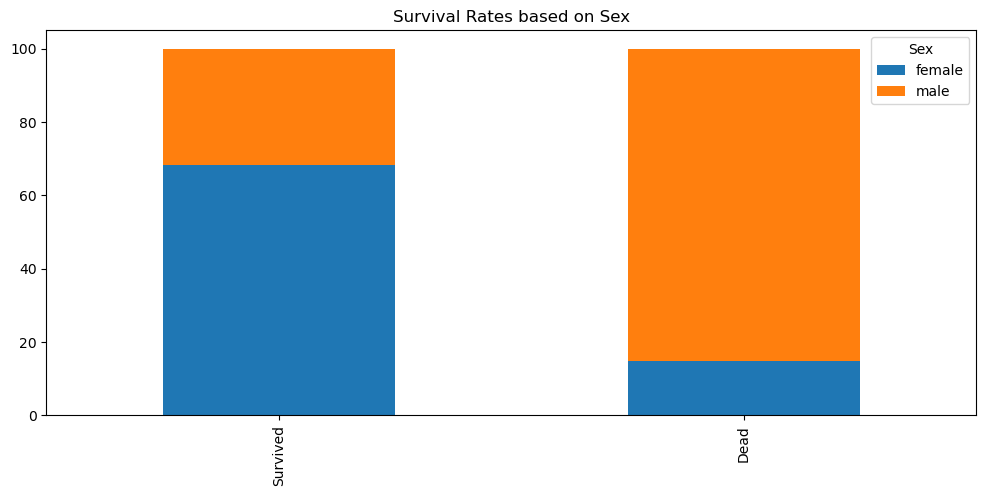

In [15]:
bar_chart(titanic, 'Sex')
plt.title('Survival Rates based on Sex')

Text(0.5, 1.0, 'Survival Rates based on Passenger Class')

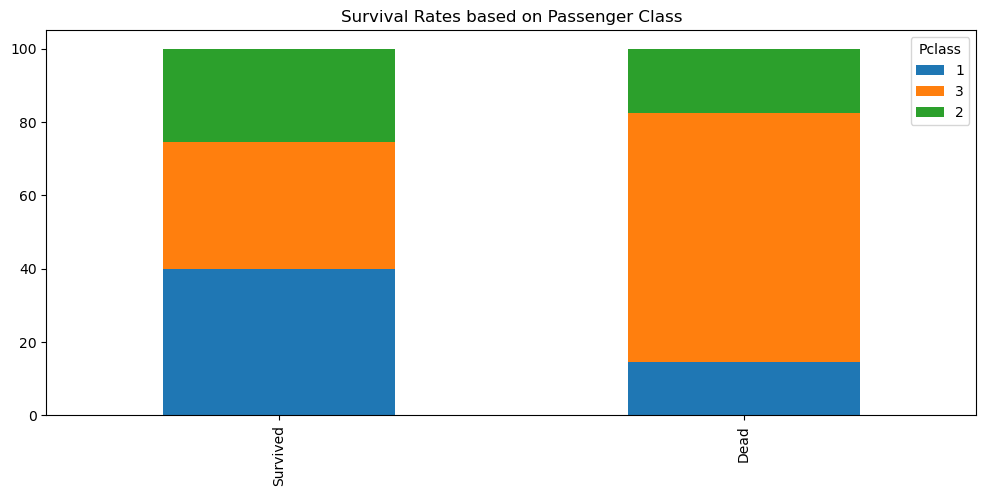

In [16]:
bar_chart(titanic, 'Pclass')
plt.title('Survival Rates based on Passenger Class')

Text(0.5, 1.0, 'Survival Rates based on City of Onboarding')

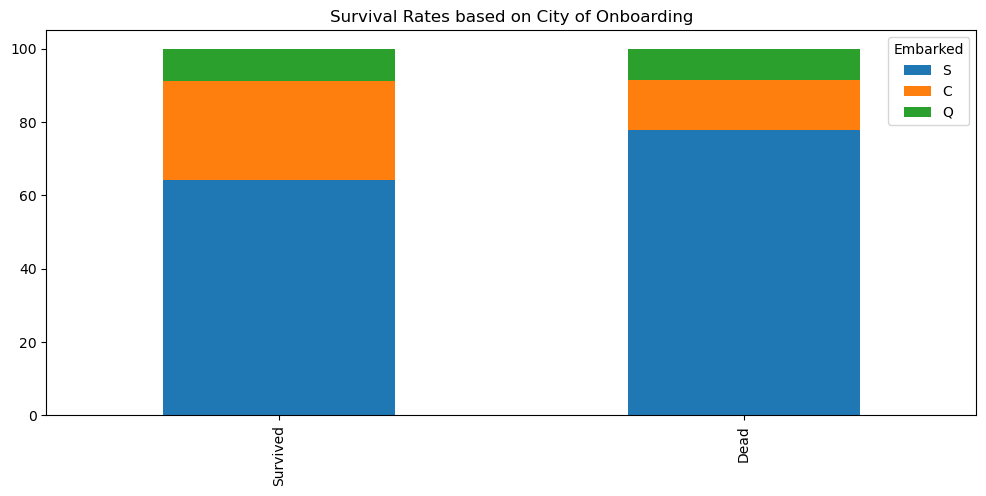

In [17]:
bar_chart(titanic, 'Embarked')
plt.title('Survival Rates based on City of Onboarding')

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [18]:
features = ['Pclass','Parch']
X = titanic[features]
y = titanic['Survived']

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [20]:
# ANSWER
# Create Model
logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [21]:
# ANSWER
# Fit Model
logreg.fit(X_train, y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [22]:
# ANSWER
logreg.coef_

array([[-0.87239066,  0.337888  ]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [23]:
# ANSWER
logreg.intercept_

array([1.30430282])

We can create tuples of the predictor names and coefficients like this:

In [24]:
# ANSWER
print(set(zip(features, logreg.coef_[0])))

{('Parch', 0.33788800487797455), ('Pclass', -0.8723906606017777)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [25]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.872391
Parch       +0.337888


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [26]:
# ANSWER
logreg.score(X_train, y_train)

0.6901197604790419

What is the  `accuracy_score` for the test data?

In [27]:
# ANSWER
logreg.score(X_test, y_test)

0.6681614349775785

What can we say about this result?

ANSWER
- the accuracy score is very similar for both test and training sets
- this means the overfitting is unlikely

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [28]:
# ANSWER
features = ['Pclass','Parch', 'Age']
X2 = titanic[features]
y2 = titanic['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=1)

In [30]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, y_train)
# Score
logreg_score = logreg.score(X_train, y_train)
logreg_score

0.7200598802395209

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- age is not a detrmining factor in survival rate
- age is not independent of other features already in the model (possibly correlated to Parch)
- imputing the missing values distorted the distribution too much (about a quarter of teh values were imputed)

Let's see where the model is going wrong by showing the Confusion Matrix:

In [31]:
# ANSWER
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[106  22]
 [ 52  43]]


Nb. Here is how `confusion_matrix` arranges its output:

In [32]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: False negatives are the most prevalent error. That is people predicted to have died in the model where they actually survived in the data.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

In [33]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
def plot_roc_curve(X_test, y_test):
    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

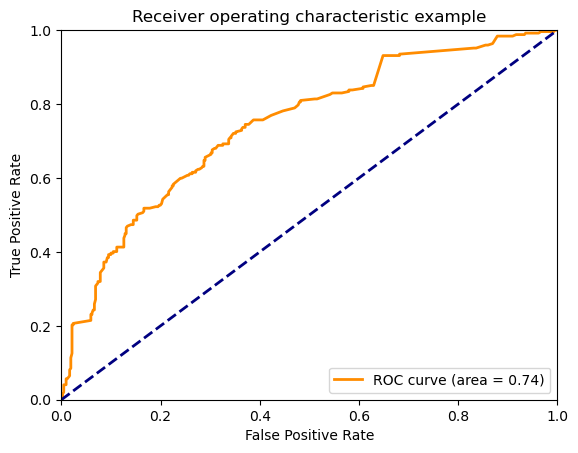

In [34]:
plot_roc_curve(X_train, y_train)

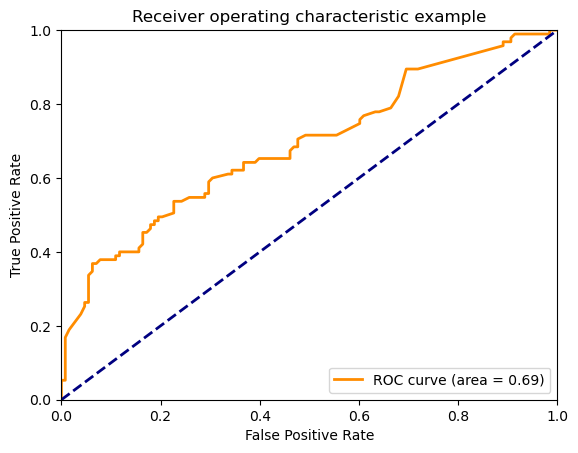

In [35]:
plot_roc_curve(X_test, y_test)

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [36]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'],
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True,False,False,True
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False,True,False,False
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True,False,False,True
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True,True,False,False
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True,False,False,True


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [37]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [40]:
# ANSWER
def get_logreg_score(data, features, target):
    X = data[features]
    y = data[target]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(X_train, y_train)

    # Score
    logreg_score = logreg.score(X_test, y_test)

    # Predict
    logreg_preds = logreg.predict(X_test)

    # Predict probability

    logreg_pred_proba = logreg.predict_proba(X_test)[:,1]

    # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
    preds = logreg.predict_proba(X_test)[:,1]

    # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    # Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

    # Return accuracy rate
    return logreg_score, logreg_preds, logreg_pred_proba

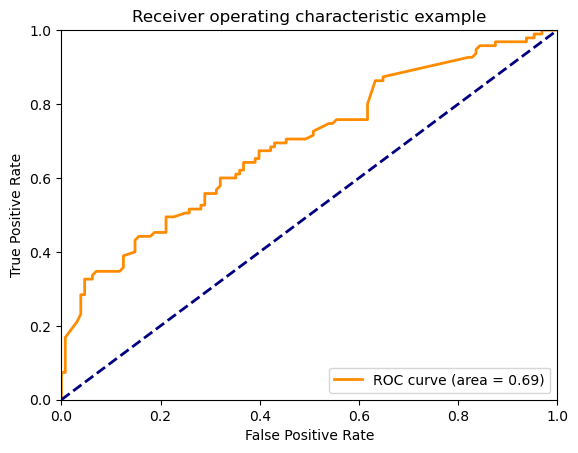

(0.6547085201793722,
 array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0], dtype=int64),
 array([0.50289591, 0.2006348 , 0.60123388, 0.21371019, 0.82211562,
        0.2565794 , 0.58813235, 0.57038728, 0.63694424, 0.17531284,
        0.22739529, 0.2204766 , 0.44341914, 0.48321813, 0.21371019,
   

In [41]:
# Set Feature Both Numerical, Categorical

target = 'Survived'
features = ['Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp']
get_logreg_score(titanic_with_dummies, features, target)

Plot the ROC curve for the new model:

Check the ROC curve above. It was included in the function. 

Can we improve the model by including the remaining features?

In [46]:
# ANSWER
target = 'Survived'
features = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']

X = titanic_with_dummies[features]
y = titanic_with_dummies[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

logreg_score_test = logreg.score(X_test, y_test)
logreg_score_train = logreg.score(X_train, y_train)

print(logreg_score_test)
print(logreg_score_train)

0.8026905829596412
0.8083832335329342


The model was indeed improved by adding the remaining features and we don't have a risk of overfitting as the score for both the train and test sets are very similar. However, we had to increase the maximum number of iterations for the logistic regression model as we have too many data points when we added all the features. This may not be efficient if we have large datasets.

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

### 1. Random State Removal

In [47]:
#Trial 1
target = 'Survived'
features = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']

X = titanic_with_dummies[features]
y = titanic_with_dummies[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

logreg_score_test = logreg.score(X_test, y_test)
logreg_score_train = logreg.score(X_train, y_train)

print(logreg_score_test)
print(logreg_score_train)

0.7713004484304933
0.812874251497006


In [48]:
#Trial 2
target = 'Survived'
features = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']

X = titanic_with_dummies[features]
y = titanic_with_dummies[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

logreg_score_test = logreg.score(X_test, y_test)
logreg_score_train = logreg.score(X_train, y_train)

print(logreg_score_test)
print(logreg_score_train)

0.7802690582959642
0.8158682634730539


In [49]:
#Trial 3
target = 'Survived'
features = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']

X = titanic_with_dummies[features]
y = titanic_with_dummies[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

logreg_score_test = logreg.score(X_test, y_test)
logreg_score_train = logreg.score(X_train, y_train)

print(logreg_score_test)
print(logreg_score_train)

0.8026905829596412
0.8098802395209581


There is a change in the results which is not very significant when we remove the random state. It is plausible to run this exercise a thousand times for example and see if there are any high variations in the model results when we remove random satte.

### 2. Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
target = 'Survived'
features = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, titanic_with_dummies[features], titanic_with_dummies[target], cv=5)
scores.mean()

0.7923796371853619

### 3. Accuracy and Recall Metrics

In [52]:
target = 'Survived'
features = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']

X = titanic_with_dummies[features]
y = titanic_with_dummies[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred_class = logreg.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[113  15]
 [ 29  66]]


Accuracy: How often is the model corrcet overall?

In [53]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.8026905829596412
0.8026905829596412


Classification error: How often is the model incorrect overall? It is simply equal to 1 - accuracy.

In [54]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.19730941704035873
0.19730941704035876


Sensitivity: How often is the model correct when the true value is positive?

In [55]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.6947368421052632
0.6947368421052632


Specificity: How often is the model correct when the true value is negative?

In [57]:
specificity = TN / (TN + FP)
print(specificity)

0.8828125


False Positive Rate: How often is the model incorrect when the true value is negative?

In [58]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.1171875
0.1171875


Precision: When the model predicts a positive value, how often is the prediction correct?

In [59]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.8148148148148148
0.8148148148148148




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



